# Music Converter Notebook

CSI4106 Artificial Intelligence   
Prepared by:

## Introduction:
For our project, we decided to do an in-depth understanding of a solution approach to an AI problem, with implementation and tests. The problem we wanted to solve is that of music genre classification. We wanted to create a baseline model, and change the features, hyperparameters, and amount of data that given to the model to see the effect different variations would have on the accuracy. To begin we researched different features that could be used as inputs into our network. We found an article that recommended the following five: zero-crossing rate, spectral centroid, spectral roll-off, Mel-Frequency Cepstral Coefficients (MFCC), chroma frequencies. These features can all be found from the short-time Fourier Transform (STFT) of the audio file, which, along with the features themselves, we will discuss in more detail throughout the notebook. The article also included a link to a well-known dataset called GTZAN which is used in many other music genre classification studies. GTZAN contains 1000 songs, separated evenly into ten different genres.  
  
The notebook is broken down into six parts. The first will explain how to decompose one song into the five desired features. It will also provide an in-depth explanation as to what the STFT of a song is, as well as what each feature represents. In part two we will extract and write into a CSV the waveform from all 1000 songs which will later be used to create our baseline model. For each song, we take a 5, 10, and 20-second sample and we will be comparing the results of these different input lengths later. In part three we perform the same task but instead of extracting the waveform into a CSV, we extract our five features for each of the 1000 songs. Part four involved creating the models and testing the input features. It is broken down into 3 subsections: the baseline, three features, and five feature inputs. Part five will cover variations on hyperparameters such as number of layers, width of each layer, etc. Finally in part six we will summarize and discuss the results achieved in each variation and compare them to our baseline.

https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8


### How the Notebook is Structured:
#### 1. Explain all 5 extracted features for 1 song.
#### 2. Show how to convert song to baseline csv form
#### 3. Show how to convert song to 5 feature csv form
#### 4. "FF. NN using Keras for a 5 feature song
#### 4a: Use Keras for baseline evaluation
#### 4b: Use keras for 3 feature eval.
#### 4c: Use Keras for 5 feature eval.
#### 5: Test our randomized hyperparameters
#### 6: Visualize all "main" keras results and discuss.

### Necessary Libraries
In order to run the following Notebook, the following libraries must first be installed:  
keras - https://keras.io/  
librosa - https://librosa.github.io/librosa/  
matplotlab - https://matplotlib.org/  
pandas - https://pandas.pydata.org/  
tensorflow (Requires Python 3.6) - https://www.tensorflow.org/  
  
To install, use the following commands:  
pip install keras  
pip install librosa  
pip install matplotlib  
pip install pandas  
pip install tensorflow

In [1]:
## Importing all necessary libraries
import librosa
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import datetime
import keras
import statistics
from keras import models
from keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from scipy import signal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.collections import PolyCollection
import numpy as np
import csv
import pandas as pd
import math

Using TensorFlow backend.


## Part 1 - Explain all 5 extracted features for 1 song:
The following section demonstrates how the features are extracted from a song and what each one represents. It uses the first song from the dataset as an example.  
#### Step 1
The first step is to get the basic waveform of the song, which simply represents amplitude of sound over time.

This song is 30 seconds long.
The sampling rate of this file is: 22050. It represents how many times per second the audio is sampled.
The value "x" represents the wave form of a song, which contains 661504 slices.
The approximate duration of the song is: 30.00018140589569. Which is what we expect since all songs are 30 seconds long.


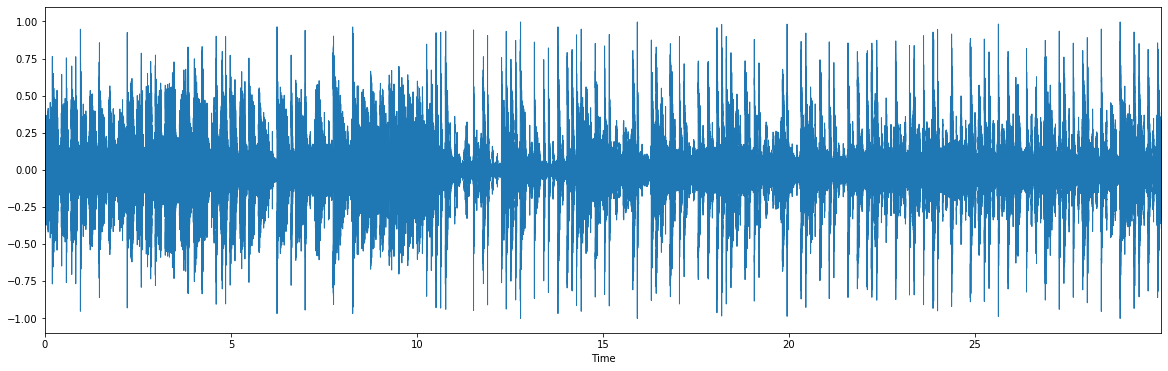

In [2]:
## Decomposing the first song in the Hip Hop folder into features

##### Step 1. Import the song file
print("This song is 30 seconds long.")
file_path = '../resources/genres/hiphop/hiphop.00000.wav'

## Load an audio file as a floating point time series.
x , sampling_rate = librosa.load(file_path)


print("The sampling rate of this file is: {0}. It represents how many times ".format(sampling_rate) +
      "per second the audio is sampled.")
print("The value \"x\" represents the wave form of a song, which contains {0} slices.".format(x.shape[0]))
print("The approximate duration of the song is: {0}. Which is what we expect since all songs are 30 seconds long.".format(len(x)/sampling_rate))

## Plot the waveform of the loaded file
plt.figure(figsize=(20, 6))
librosa.display.waveplot(x, sr=sampling_rate)



#### Step 2
The next step is to use librosa.stft() to decompose the waveform into its short-time Fourier Transform  
  
The STFT breaks down a signal into amplitude over time of each frequency. To demonstrate this more clearly, Figure 1 below shows a 3D spectrogram example from Wikipedia. To explain it more clearly, we'll take an example of a sound recording. The frequency axis represents all the possible frequencies in that recording. The time axis represents different times in the recording. The z or amplitude axis represents the amplitude (or level) of sound.

In the Figure, we can see that the amplitude of the low frequencies is also low. As the frequency gets higher, the amplitude also increases, meaning this recording was of a higher pitched sound.

The plots in the next section represent the same thing as Figure 1 and have the same frequency and time axis. However, instead of a third dimension for amplitude, they uses colour to show higher amplitudes across the 2D plane. 
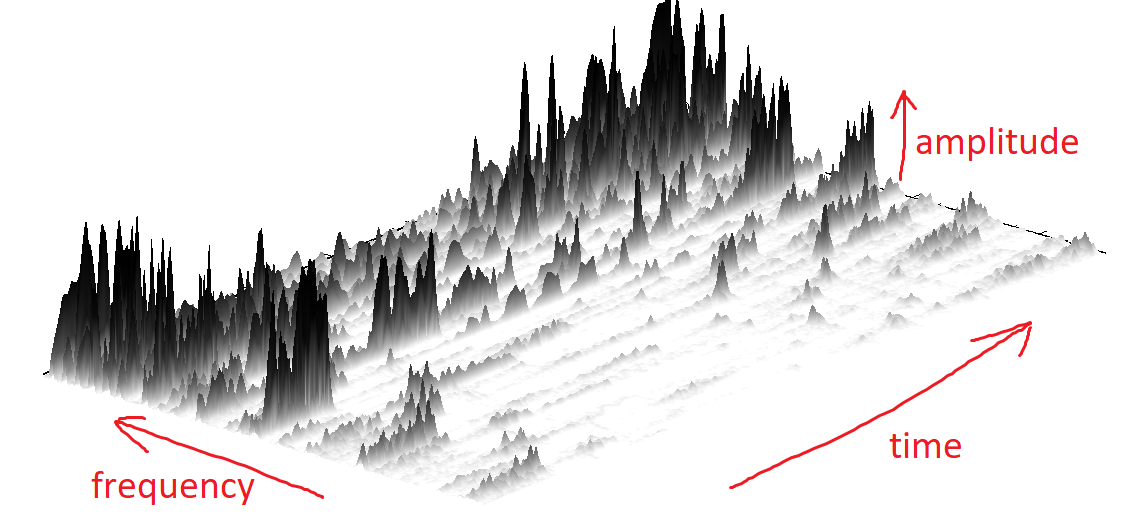
(Figure 1 Source:https://en.wikipedia.org/wiki/Spectrogram?fbclid=IwAR0Pzq_aS1hJtt-eEZxJyE1cZa6pEEKzYQBlhYer8x4CUOvHr_fOPkg89A8#/media/File:Spectrogram.png)

The following is a 3D representation of the previous spectrogram.


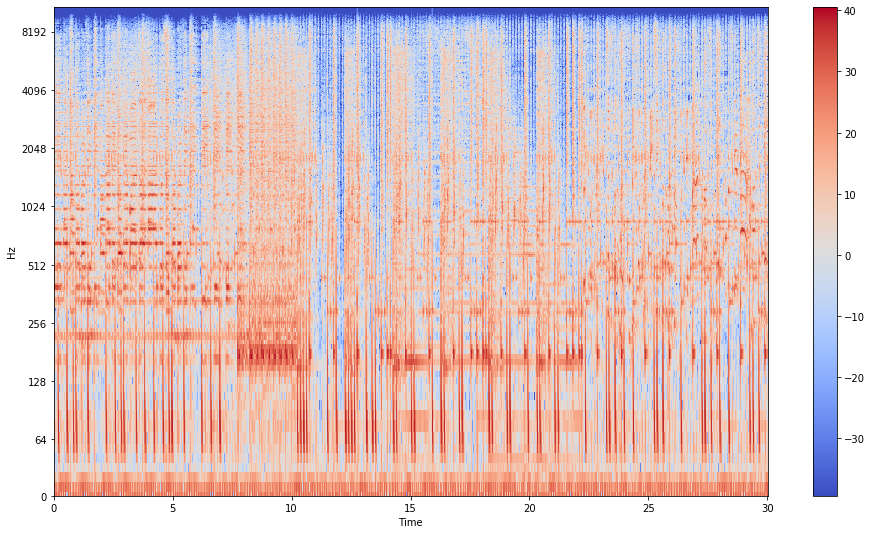

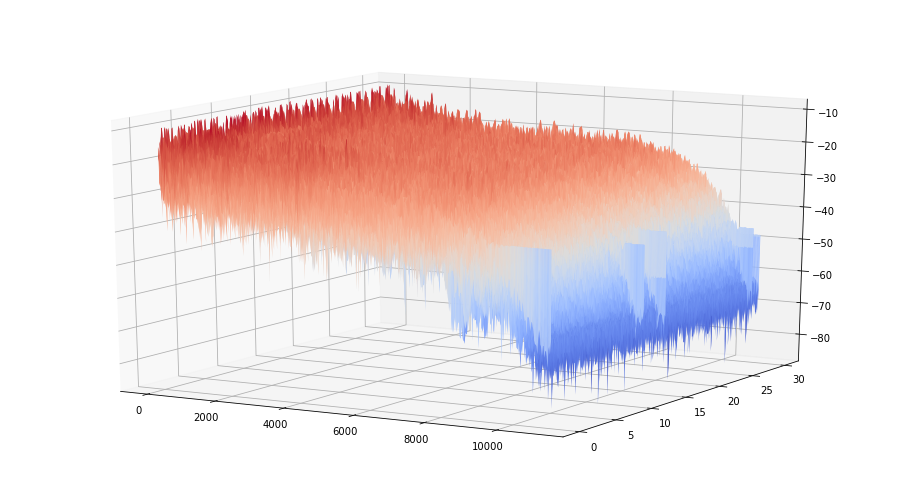

The following is a subset from 0-512Hz of the 3D spectogram.


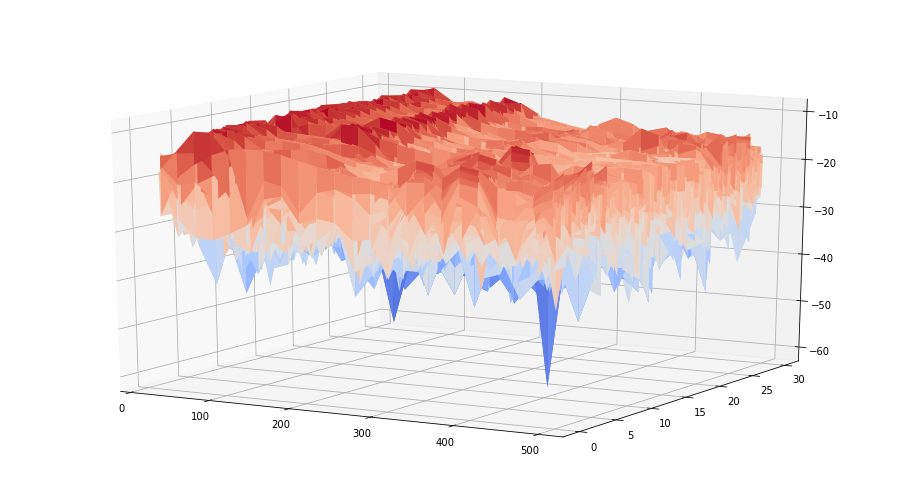

In [3]:
##### Step 2. Apply Short-Time Fourier Transform (STFT) to Decompose Wave Form to base frequencies

## This function converts our file into a time-frequency domain representation using short-time Fourier transform 
## (essentially this is the change of FFT's over time)
wav_form = librosa.stft(x)
S_spectogram, phase_spectogram = librosa.magphase(librosa.stft(y=x))

## Plot the spectrogram of the STFT representation
wav_form_db = librosa.amplitude_to_db(abs(wav_form))
plt.figure(figsize=(16,9))
librosa.display.specshow(wav_form_db, sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar()
plt.ion()



##Ploting the 3D represenation spectrogram of the SFTF 
f, t, Zxx = signal.stft(x, sampling_rate, nperseg=1025)
Zxx=abs(Zxx)


fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot_surface(f[:, None], t[None, :],10.0*np.log10(Zxx),rcount=2046, ccount=2046,cmap = cm.coolwarm)
ax.view_init(15, -60)
print ("The following is a 3D representation of the previous spectrogram.")
plt.show()

##Ploting the 3D represenation spectrogram of the SFTF in the frequence range of 0-512
myfilter = (f>000) & (f<512)
f = f[myfilter]
Zxx = Zxx[myfilter, ...]

fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
ax.plot_surface(f[:, None], t[None, :],10.0*np.log10(Zxx),rcount=2046, ccount=2046,cmap = cm.coolwarm)
ax.view_init(15, -60)
print ("The following is a subset from 0-512Hz of the 3D spectogram.")
plt.show()

##TODO:Add titles and axis for all the graphs. 

#### Step 3
Finally we can begin extracting our features. As mentioned before, we are using 5 distinct features: Zero-Crossing Rate, Spectral Centroid, Spectral Roll-off, Mel-Frequency Cepstral Coefficients (MFCC), Chroma Frequencies

From the image below which represents a small slice of time. The number of crossings 0 is 15 



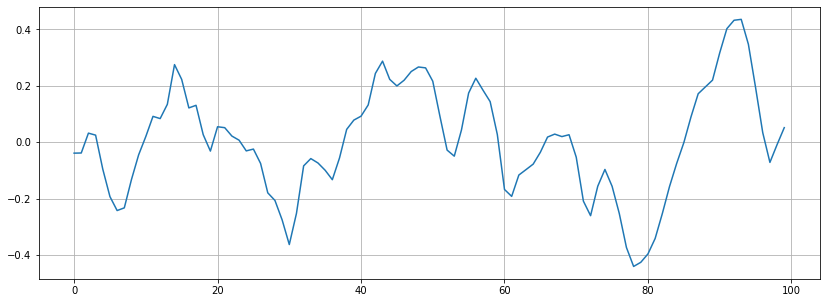

In [4]:
##### Step 3. Use the "wav_form_dB" decomposed song for Feature Extraction

# Feature 1: Zero-Crossing Rate 
## This represents how many times the frequency passes the "0" x-axis in either negative or positive direction
m0 = 10000
m1 = 10100
plt.figure(figsize=(14,5))
plt.plot(x[m0:m1])
plt.grid()
zero_crossing_sample = librosa.zero_crossings(x[m0:m1], pad=False)
print("From the image below which represents a small slice of time. The number of crossings " +
     "0 is {0} \n".format(sum(zero_crossing_sample)))
#print (zero_crossing_sample)

In [5]:
# Zero Crossing feature applied to entire song
zero_crossings = librosa.zero_crossings(x, pad=False)
print("When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has " + 
      "{0} zero crossings".format(sum(zero_crossings)))

When this idea of zero crossings is extended to the entire 30 second portion of a song, this song has 97628 zero crossings


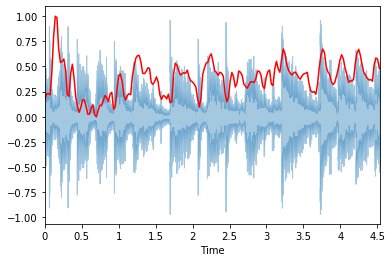

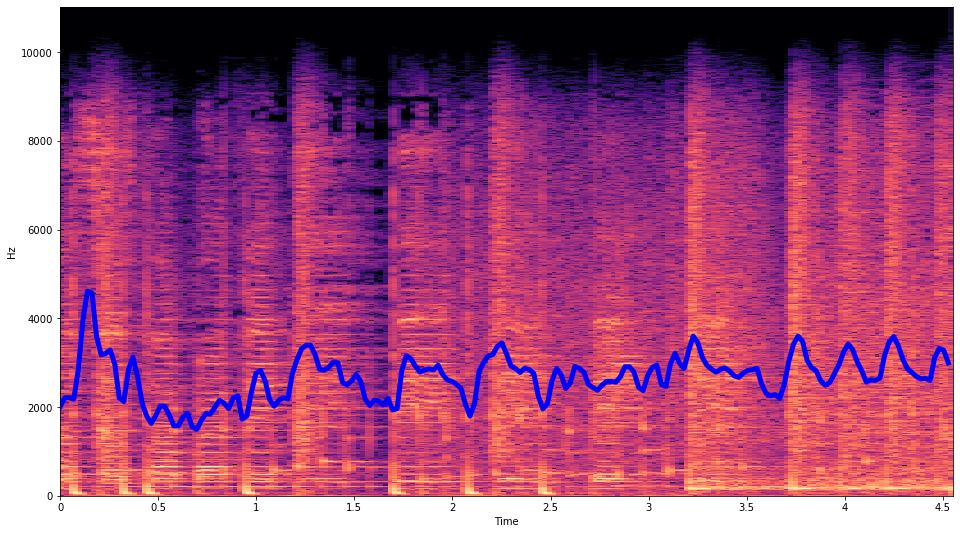

In [6]:
# Feature 2: Spectral Centroid 
## This feature represents taking a "slice" of a song and then taking the average of all frequencies at the
## point in time the slice represents. Extend this idea to ALL slices that make up a song, and
## using these averages plot a line that traverses exactly through each point, this is the Spectral Centroid
## of a song. This is important because two different genres may "generally" have a different spectral centroid line.

# Smaller Sample taken for demonstration below
n0 = 100000
n1 = 200000
x_sample = x[n0:n1]
spectral_centroids_sample = librosa.feature.spectral_centroid(x_sample, sr=sampling_rate)[0]
spectral_centroids_sample.shape

frames = range(len(spectral_centroids_sample))
t = librosa.frames_to_time(frames)

# Normalize
def normalize(x_sample, axis=0):
    return sklearn.preprocessing.minmax_scale(x_sample, axis=axis)

librosa.display.waveplot(x_sample, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids_sample), color='r')

## Alternative representations



##TODO: add appropriate plot titles 

S_sample, phase_sample = librosa.magphase(librosa.stft(y=x_sample))
plt.figure(figsize = (16,9))
librosa.display.specshow(librosa.amplitude_to_db(S_sample, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_centroids_sample, lw = 5.0, color='b')




## TODO: Add comment to describe code above. Change code above slightly also.
## TODO: Add comment describing image below.

In [7]:
# Full song taken as spectral_centroid

spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]
print(spectral_centroids.shape)

(1293,)


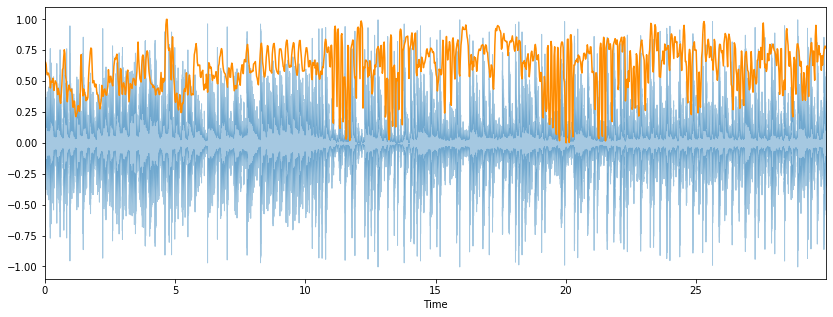

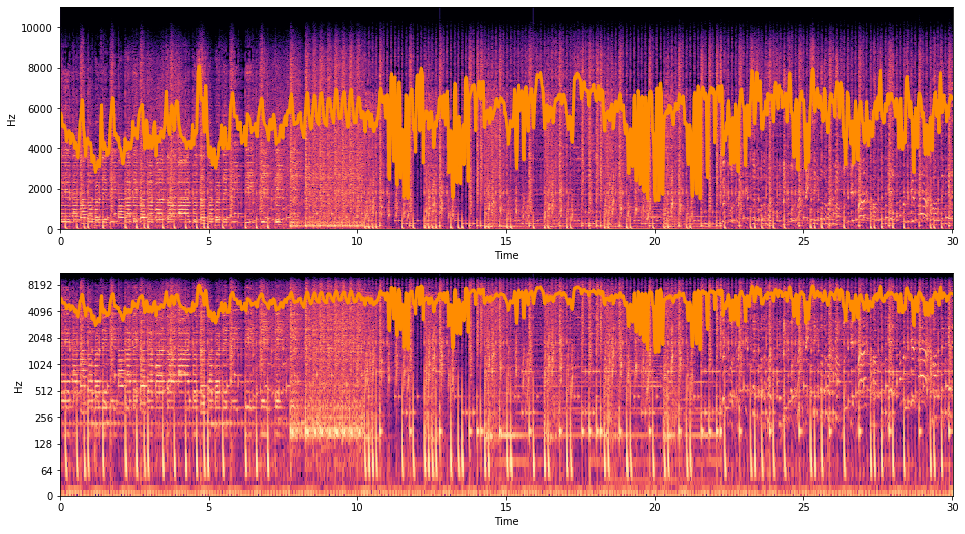

(1293,)


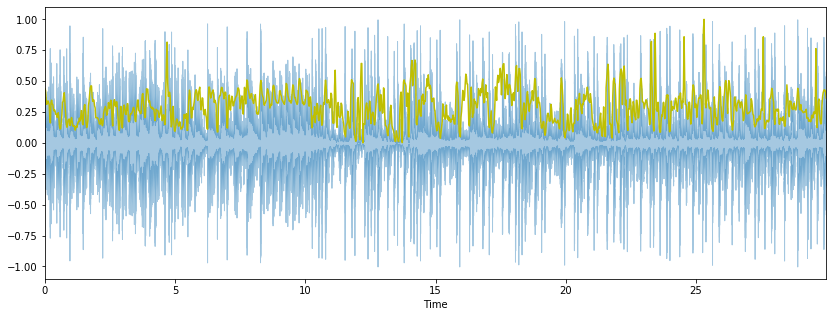

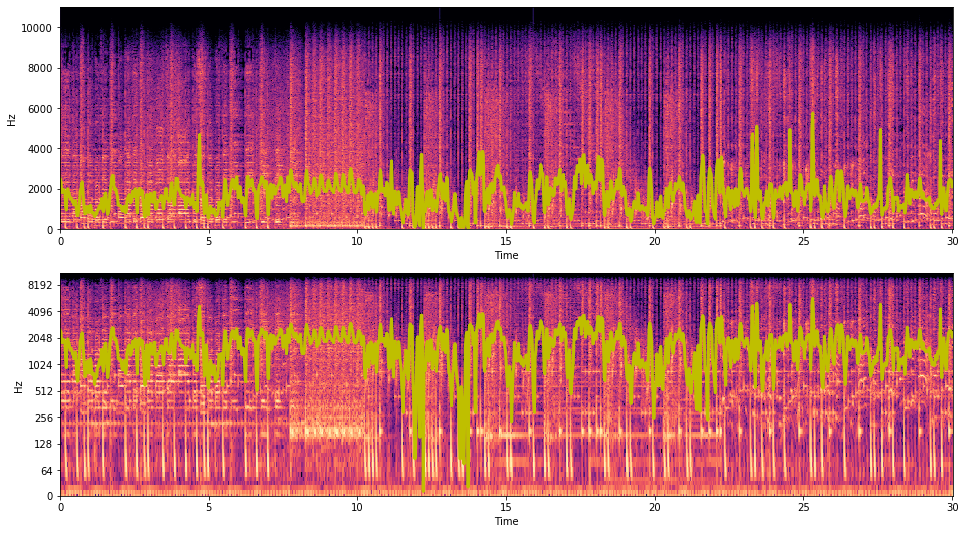

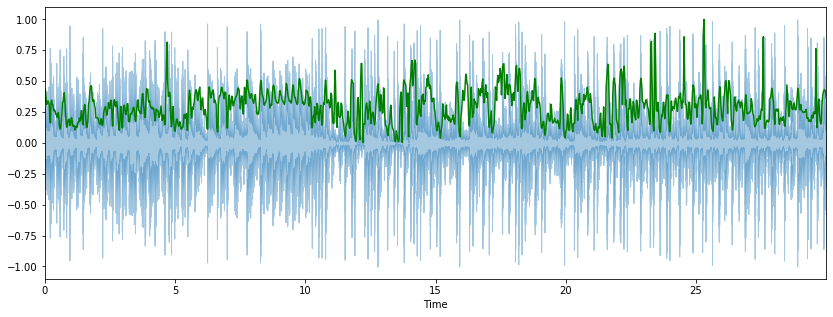

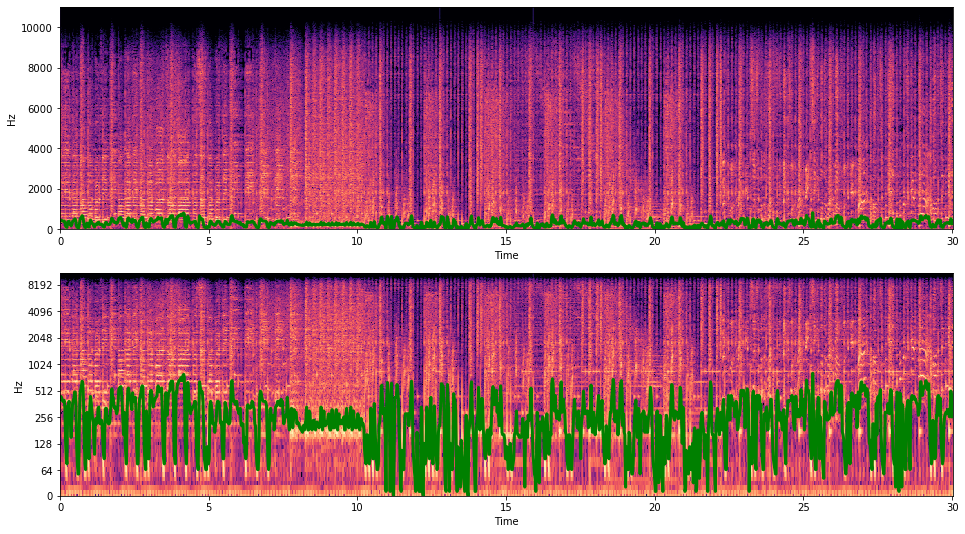

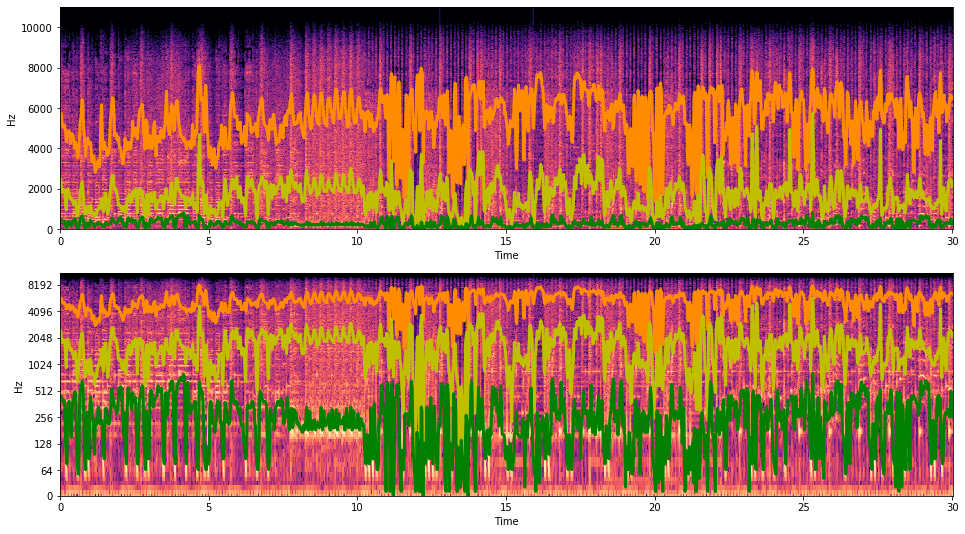

In [8]:
# Feature 3: Spectral Roll-off
## For a single slice of the stft the total "Energy" of all frequencies the it is composed of is always equal
## to "100%". Spectral-Roll off finds the frequency at which a certain given percentage of the energy is. For
## example, the Spectral Roll-Off at 85% of a song might be at 6000Hz. To find this value, it adds these composite
## frequencies in order of highest frequencies in terms of Hz, to lower frequencies. This approach is applied to the
## entire song at each slice which ends up creating a series of points on a graph that are joined together by a line
## passing directly through all points to create the Spectral Roll-off.




# Smaller Sample taken for demonstration below
## Spectral Roll Percent at 85% 



spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.85)[0]

frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='darkorange')


plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.show()



print(spectral_rolloff.shape)

## Spectral Roll Percent at 45%
spectral_rolloff_2= librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.45)[0]
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff_2), color='y')

plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.show()

## Spectral Roll Percent at 10%
spectral_rolloff_3= librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=0.1)[0]
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sampling_rate, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff_2), color='g')

plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.show()

#Plotting the 3 different rolloffs percentages on the same graph both on a linear hz scale and a log hz scale
plt.figure(figsize = (16,9))
plt.subplot(2,1,1)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='hz', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.subplot(2,1,2)
librosa.display.specshow(librosa.amplitude_to_db(S_spectogram, ref=np.max),y_axis='log', x_axis='time')
plt.plot(t,spectral_rolloff, color='darkorange', lw=3)
plt.plot(t,spectral_rolloff_2, color='y', lw=3)
plt.plot(t,spectral_rolloff_3, color='g', lw=3)
plt.show()
##TODO: Explain difference in the 3 graphs and add labels and axis 

##TODO: Add spectral reprisentation to the roll off frequency as an alternative data visualization IOT synch with feature 2 
## and to add extra from the DS post. 

(20, 1293)


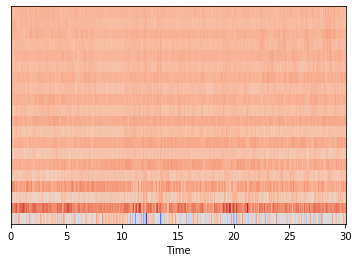

In [9]:
# Feature 4: Mel-Frequency Cepstral Coefficients (MFCC)
## This feature represents:This feature is a way to represent human auditory sounds

mfccs = librosa.feature.mfcc(x, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

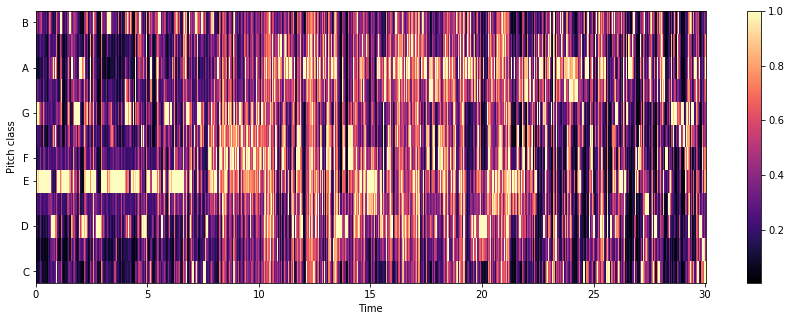

In [10]:
# Feature 5: Chroma Frequencies
## This feature represents: This will will divide the spectrum in to 12 distinct semitones that represent that
## represent a musical octave, for the entire song.

chromagram = librosa.feature.chroma_stft(x, sr=sampling_rate )
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')
plt.colorbar()



## Part 2 - Convert song to baseline csv form & read values
In this section, we convert all 1000 songs from the dataset into their waveforms and store them in a CSV file (included in the Project folder). Storing them in a CSV means we won't have to complete this step every time the program is closed and reopened and also allows for easy access.  
  
For each song, we take a 5, 10, and 20 second waveform. These will be used later to compare how the length of a sample affects the accuracy.

In [10]:
## baseline_waveform_512_subset extracts the waveform of each song. To do so, it loads the song and then takes the average
## value for every 512 sample points and creates one point for them, thus compressing the sample to a more manageable size.
## It is possible to simply take a different sampling rate by passing the parameter to the load() function, however, we
## wanted to know exactly how it was being resampled and there is limited documentation about resampy's ‘kaiser_best’.
## After compressing, we add the new sample point to the list wave_form_downsize and continue iterating through until the
## entire song has been sampled.

def baseline_waveform_512_subset(songFilePath,startTime,duration):
    x , sampling_rate = librosa.load(songFilePath, offset= startTime, duration=duration)
    wave_form_downsize = []
    start_point = 0

    for i in range (0,(math.floor(x.shape[0]/512))):
        sum_512=0.0
        for j in range (start_point, start_point + 512):
            sum_512+=x[j]
        wave_form_downsize.append(float(sum_512/512))
        start_point+=512
    return wave_form_downsize
    

## Create a csv file into which the sampled waveform will be written. The file will include a column for the filename,
## genre, and each of the sampled values.
def csvCreatorBaseline (file_name,size):
    header_elements =["filename "]
    for l in range (1, size+1):
        header_elements.append(f' waveform slice {l}')
    header_elements.append('genre')
    file = open(file_name,'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header_elements)
        
## CSV Appendor Method for adding the extrated music feautres to the CSV File. Appends the sampled values into the CSV
## file.
def csvAppendorBaseline (csvFile_name, waveform_512_split, song_file_path, genre):
    to_append =f'{song_file_path}'
    to_append += " "
    for i in range(0,len(waveform_512_split)):
        to_append += str(waveform_512_split[i])
        to_append +=" "
    to_append += " "
    to_append += genre
    file = open(csvFile_name, 'a', newline='')  
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())
        

In [12]:
## Calculates how many sample points each file will have. The number of sample points will depend on the length of the
## sample chosen and we have decided to take 5, 10, and 20 second samples of each song in order to compare how they 
## perform. Since each is sampled at the same rate, the longer samples will have more points.
second_5=math.floor((5*22050)/512)
second_10=math.floor((10*22050)/512)
second_20=math.floor((20*22050)/512)

## Call the csvCreatorBaseline method to generate 3 different CSV files, one for each sample length.
csvCreatorBaseline("baseline_5sec.csv",second_5)
csvCreatorBaseline("baseline_10sec.csv",second_10)
csvCreatorBaseline("baseline_20sec.csv",second_20)

## Create a list of the 10 genres in the dataset to iterate through
genres = ["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]

file_path_b='../resources/genres/'

## Iterate through the list of genres and for each one, open the folder containing its songs and for every song,
## create a 5, 10, and 20 second sample and write those samples into their respective CSV file.
print("Start")
count=0
for x in genres:
    file_path_g= file_path_b + x +'/'+x +'.000'

    for y in range(0, 100):
        y_string = str(y)
        file_path_s = file_path_g + y_string.rjust(2,'0') + '.wav'
        
        #extracting baseline from 5 seconds
        baseline_512_split_5= baseline_waveform_512_subset(file_path_s,12.5,5)
        csvAppendorBaseline("baseline_5sec.csv",  baseline_512_split_5,file_path_s[file_path_s.rfind('/')+1:], x)
        
        #extracting baseline from 10 seconds
        baseline_512_split_10= baseline_waveform_512_subset(file_path_s,10,10)
        csvAppendorBaseline("baseline_10sec.csv",  baseline_512_split_10,file_path_s[file_path_s.rfind('/')+1:], x)
        
        #extracting baseline from 20 seconds
        baseline_512_split_20= baseline_waveform_512_subset(file_path_s,5,20)
        csvAppendorBaseline("baseline_20sec.csv",  baseline_512_split_20,file_path_s[file_path_s.rfind('/')+1:], x)
        if count%100 == 0:
            print(count)
        count+=1
                
        
print("End")

Start
0
100
200
300
400
500
600
700
800
900
End


## Part 3 - Convert song to 5 feature CSV form
Now we extract the 5 unique features from each song and store them in their own CSV file. For each song, we again take data for 5, 10, and 20 second snippets. This section typically can take around 40 minutes to run, depending on CPU power. For convenience, the CSV is already created and included in the folder. 

In [ ]:
## Create a csv file into which the 5 features will be written. The file will include a column for the filename,
## genre, and clomuns for all the features. 

def csvCreatorFiveFeat (file_name):
    header_elements =["filename ", "spectral_centroid ",  "rolloff ", "zero_crossing_rate"]
    pitch = ["c", "c#", "d", "d#","e", "f", "f#", "g", "g#", "a", "a#", "b"]
    header=''
    for l in range (1, 21):
        header_elements.append(f' mfcc{l}')
    for i in range (1,13):
        header_elements.append(f"chroma_pitch_{pitch[i-1]}") 
    header_elements.append('genre')
    file = open(file_name,'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header_elements)


        
## CSV Appendor Method for adding the extrated music feautres to the CSV File. It takes as input each of the features
## as well as the name of the CSV file they will be added to, and then appends each.
def csvAppendor (csvFile, zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, song_file_path, genre):
    to_append =f'{song_file_path} {np.mean(spectral_centroids)} {np.mean(spectral_rolloff)} {sum(zcr)}'   
    for e in mfccs:
        to_append += f' {np.mean(e)}'
    for h in chroma:
        to_append += f' {np.mean(h)}'
    to_append += " "
    to_append += genre
    file = open(csvFile, 'a', newline='')  
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())



## Feature Extraction Method. The location of the song file is determined by songFilePath and the sample is taken
## from startPoint and has a length determined by duration. rollPercent represents the percentage at which we want
## to calculate the spectral rolloff, as explained earlier in this notebook.

def featureExtractor (songFilePath, startTime, duration,rollPercent):
    x , sampling_rate = librosa.load(songFilePath, offset= startTime, duration=duration)
    zcr = librosa.zero_crossings(x)
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sampling_rate)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sampling_rate, roll_percent=rollPercent)[0]
    mfccs = librosa.feature.mfcc(x, sr=sampling_rate)
    chroma = librosa.feature.chroma_stft(x, sr=sampling_rate)
    
    return zcr, spectral_centroids, spectral_rolloff, mfccs, chroma

In [54]:
## Call the csvCreatorFiveFeat function to create the CSV files for the 5, 10, and 20 second samples

csvCreatorFiveFeat('feature_extraction_5sec.csv')
csvCreatorFiveFeat('feature_extraction_10sec.csv')
csvCreatorFiveFeat('feature_extraction_20sec.csv')


## Create a list of the 10 genres in the dataset to iterate through
genres = ["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]

file_path_b='../resources/genres/'

## Iterate through the list of genres and for each one, open the folder containing its songs and for every song,
## create a 5, 10, and 20 second sample and write those samples into their respective CSV file.
print("Start")
for x in genres:
    file_path_g= file_path_b + x +'/'+x +'.000'

    for y in range(0, 100):
        y_string = str(y)
        file_path_s = file_path_g + y_string.rjust(2,'0') + '.wav'
        
        #extracting features from 5 seconds
        zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 12.5,5,0.85)
        csvAppendor('feature_extraction_5sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
         #extracting features from 10 seconds
        zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 10,10,0.85)
        csvAppendor('feature_extraction_10sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
         #extracting features from 10 seconds
        zcr, spectral_centroids, spectral_rolloff, mfccs, chroma = featureExtractor(file_path_s, 5,20,0.85)
        csvAppendor('feature_extraction_20sec.csv',zcr, spectral_centroids, spectral_rolloff, mfccs, chroma, file_path_s[file_path_s.rfind('/')+1:], x)
    print(x)
print("End")


Start
blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock
End


## 4. "FF. NN using Keras for a song
Now that we have all our data in a CSV file, we can easily extract it and run it through our network. For each section below, we will read the data from the CSV into a pandas DataFrame. We then remove the "genre" value from each and store it in a numpy array to be used as our tags. We also remove the filename so that it does not become an input to our network and create a bias on the results. 

In [11]:
# Read the data from the baseline CSV into a pandas DataFrame and then display the first 110 rows
X = pd.read_csv("baseline_5sec.csv")
X.head(110)

filename    waveform slice 1   waveform slice 2  \
0        blues.00000.wav           0.007508           0.003513   
1        blues.00001.wav          -0.010699           0.003538   
2        blues.00002.wav           0.002415           0.002317   
3        blues.00003.wav          -0.001829          -0.001967   
4        blues.00004.wav          -0.000511           0.000285   
..                   ...                ...                ...   
105  classical.00005.wav           0.001196          -0.000235   
106  classical.00006.wav          -0.000600          -0.000578   
107  classical.00007.wav           0.009712          -0.003834   
108  classical.00008.wav           0.001396          -0.001719   
109  classical.00009.wav           0.000479           0.001845   

      waveform slice 3   waveform slice 4   waveform slice 5  \
0            -0.001052          -0.008901          -0.002530   
1            -0.007231           0.001489          -0.001021   
2             0.008219          -0.013017          -0.003338   
3             0.003031          -0.000293          -0.005193   
4            -0.000222           0.000066          -0.001174   
..                 ...                ...                ...   
105          -0.000866          -0.000073           0.000433   
106          -0.001711           0.000875          -0.000703   
107           0.002507          -0.003569          -0.005974   
108          -0.000609          -0.000040           0.000257   
109          -0.001223          -0.003008           0.002352   

      waveform slice 6   waveform slice 7   waveform slice 8  \
0             0.006609          -0.005321          -0.000496   
1             0.010835           0.004215          -0.004211   
2             0.011427           0.000655          -0.010804   
3            -0.012745           0.011862           0.006674   
4            -0.000217           0.000099          -0.000297   
..                 ...                ...                ...   
105           0.000197          -0.001364           0.001035   
106           0.001253          -0.000572          -0.001890   
107           0.012334          -0.004949           0.001256   
108           0.000570          -0.000907           0.001279   
109          -0.000727          -0.000292           0.001475   

      waveform slice 9  ...   waveform slice 207   waveform slice 208  \
0             0.011122  ...            -0.006964            -0.002519   
1             0.004666  ...             0.009885            -0.019588   
2             0.007993  ...            -0.000780            -0.004348   
3             0.001644  ...            -0.000454            -0.007867   
4            -0.000253  ...            -0.000033            -0.001244   
..                 ...  ...                  ...                  ...   
105          -0.000426  ...            -0.000348            -0.000079   
106          -0.000804  ...             0.007173             0.003523   
107          -0.002089  ...            -0.003499             0.003245   
108          -0.000126  ...            -0.000309             0.001372   
109           0.001807  ...            -0.000617             0.002143   

      waveform slice 209   waveform slice 210   waveform slice 211  \
0               0.002054            -0.011948             0.005687   
1              -0.004436             0.021149            -0.001792   
2               0.006158             0.000114            -0.003582   
3               0.006917            -0.003742            -0.002446   
4               0.004282            -0.000490            -0.004147   
..                   ...                  ...                  ...   
105             0.000132             0.000351            -0.000205   
106            -0.015170             0.000498             0.010266   
107             0.000444            -0.004202             0.005785   
108            -0.001465            -0.000100            -0.000839   
109             0.000087            -

In [12]:
# Read the data from the features CSV into a pandas DataFrame and then display the first 110 rows
X = pd.read_csv("feature_extraction_10sec.csv")
X.head(110)

filename   spectral_centroid      rolloff   zero_crossing_rate  \
0        blues.00000.wav         1803.133844  3874.952361               18036   
1        blues.00001.wav         1581.277785  3677.831125               11714   
2        blues.00002.wav         1507.457456  2953.071470               16165   
3        blues.00003.wav         1139.971185  2369.002071                7808   
4        blues.00004.wav         1766.557653  3382.411566               21503   
..                   ...                 ...          ...                 ...   
105  classical.00005.wav         1395.572746  2462.104447               15978   
106  classical.00006.wav         1342.758942  2491.706356               15573   
107  classical.00007.wav         1494.957943  2878.379733               17275   
108  classical.00008.wav         1511.921962  2824.696609               16511   
109  classical.00009.wav         1065.172264  2046.653517               10413   

          mfcc1       mfcc2      mfcc3      mfcc4      mfcc5      mfcc6  ...  \
0   -104.649918  122.307770 -16.163612  40.851635 -10.409742  18.029104  ...   
1   -222.168320  124.332985  11.157734  38.722603  -0.684762  27.818092  ...   
2   -100.241463  145.478943 -31.026257  36.446129 -16.617540  26.852818  ...   
3   -196.463791  147.607086   7.918547  27.065449   1.712060  17.066572  ...   
4   -174.250931  133.306839 -42.391041  27.084778 -32.371269  13.564564  ...   
..          ...         ...        ...        ...        ...        ...  ...   
105 -340.402618  135.558853 -33.810989  31.324970  -4.022440   0.232453  ...   
106 -305.833832  133.971725 -22.754091  38.675068  -5.046348   6.411022  ...   
107 -231.215240  136.595749 -28.466194  41.856594  -9.578016   7.375572  ...   
108 -301.656281  126.905128 -28.838652  39.648598  -9.574334   6.327945  ...   
109 -332.785889  153.421753  -9.929903  44.491287  -9.099988  13.402217  ...   

     chroma_pitch_d#  chroma_pitch_e  chroma_pitch_f  chroma_pitch_f#  \
0           0.258259        0.260204        0.359026         0.378731   
1           0.268387        0.234487        0.361632         0.448754   
2           0.402194        0.514248        0.325458         0.296213   
3           0.549215        0.606650        0.559762         0.461348   
4           0.218298        0.250931        0.595270         0.198476   
..               ...             ...             ...              ...   
105         0.397137        0.165235        0.252699         0.134238   
106         0.223013        0.150102        0.348308         0.185105   
107         0.464028        0.222849        0.320473         0.180397   
108         0.214683        0.154440        0.323123         0.151973   
109         0.433791        0.214247        0.149411         0.207367   

     chroma_pitch_g  chroma_pitch_g#  chroma_pitch_a  chroma_pitch_a#  \
0          0.485020         0.340910        0.325685         0.448693   
1          0.647830         0.494835        0.260851         0.227180   
2          0.261866         0.301794        0.367442         0.403937   
3          0.286164         0.250011        0.303710         0.315437   
4          0.134759         0.217967        0.333235         0.589312   
..              ...              ...             ...              ...   
105        0.289198         0.418639        0.307205         0.223452   
106        0.279377         0.308991        0.112723         0.099403   
107        0.356323         0.329285        0.241851         0.338114   
108        0.283498         0.299654        0.227941         0.214152   
109        0.341376         0.212215        0.268903         0.360292   

     chroma_pitch_b      genre  
0          0.399072      blues  
1          0.250847      blues  
2          0.643666      blues  
3          0.415873      blues  
4          0.215899      blues  
..              ...        ...  
105        0.206002  classical  
106        0.301584  classical  
107        0.120732  classical

In [13]:
## This version will normalize the above Neural Network results by running each neural network 100 times
## and then taking the average of the results

def read_data(file_name):
    data = pd.read_csv(file_name)
    #print("*BEFORE* Shape of data file \"{0}\" is: {1}".format(file_name, data.shape))
    return data

def create_genre_list(data):
    genre_list = data.iloc[:, -1]
    return genre_list

# Encoding occurs in here
def get_y_value(data):
    genre_list = create_genre_list(data)
    encoder = preprocessing.LabelEncoder()
    y = encoder.fit_transform(genre_list)
    return y

# Scaling occurs in here
def get_x_value(data):
    data = data.drop(['filename '],axis=1)
    data = data.drop(['genre'],axis=1)
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
    #print("*AFTER* Shape of data file is: {0}".format(data.shape))
    return X

def get_x_value_3_feature(data):
    data = data.drop(['filename '],axis=1)
    data = data.drop(['genre'],axis=1)
    data = data.drop(['rolloff '], axis=1)
    data = data.drop(['zero_crossing_rate'], axis=1)
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
    #print("*AFTER* Shape of data file is: {0}".format(data.shape))
    return X

def get_baseline_file_names():
    return ["baseline_5sec.csv",
            "baseline_10sec.csv",
            "baseline_20sec.csv"]

def get_5_feature_file_names():
    return ["feature_extraction_5sec.csv",
            "feature_extraction_10sec.csv",
            "feature_extraction_20sec.csv"]

def create_and_run_nn(X_train, X_test, y_train, y_test):
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    hist = model.fit(X_train,
                    y_train,
                    epochs=20,
                    verbose=0,
                    batch_size=128)

    # Get Accuracy
    test_loss, test_acc = model.evaluate(X_test,y_test)
    #print(test_acc)
    return test_acc

def train_and_eval(file, num_iterations=1, num_features = 5):
    # Generates the results for Baseline and 5 feature NN with same hyperparameter setup
    i = 0
    acc_list = []
    while i < num_iterations:
        data = read_data(file)
        y = get_y_value(data)

        # Used only to handle if 3 features, else assumes it is 5 feature case
        if num_features == 3:
            X = get_x_value_3_feature(data)
        else:
            X = get_x_value(data)
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
        test_acc_result = create_and_run_nn(X_train, X_test, y_train, y_test)
        acc_list.append(test_acc_result)
        i += 1
    return acc_list

# Gathers statistics on test accuracy list, and passes them to a print function
def get_statistics(acc_list, song_length=5, num_features=0):
    mean = statistics.mean(acc_list)
    min_res = min(acc_list)
    max_res = max(acc_list)
    print_results(song_length, mean, min_res, max_res, num_features)
    
# Prints out formatted statistics
def print_results(song_length, mean, min_res, max_res, num_features=0):
    if num_features == 0:
        print("Baseline file with {0} second song clips, scored a mean test accuracy of: {1}".format(song_length, mean))
    elif num_features == 3:
        print("3 Feature file with {0} second song clips, scored a mean test accuracy of: {1}".format(song_length, mean))
    else:
        print("5 Feature file with {0} second song clips, scored a mean test accuracy of: {1}".format(song_length, mean))
    print("With a Min score of: {0}  ---  Max score of: {1}".format(min_res, max_res))

def run_nn_main(num_iterations=1):
    files_baseline = get_baseline_file_names()
    files_5f = get_5_feature_file_names()
    
    # Generate test accuracy results of baseline for num_iteration times
    for i in range(len(files_baseline)):
        if i == 0:
            acc_list_b_5sec = train_and_eval(files_baseline[i], num_iterations)
            get_statistics(acc_list_b_5sec, 5)
            
        if i == 1:
            acc_list_b_10sec = train_and_eval(files_baseline[i], num_iterations)
            get_statistics(acc_list_b_10sec, 10)

        if i == 2:
            acc_list_b_20sec = train_and_eval(files_baseline[i], num_iterations)
            get_statistics(acc_list_b_20sec, 20)
            
    # Generate test accuracy results of 3 features for num_iteration times
    for i in range(len(files_5f)):
        if i == 0:
            acc_list_3f_5sec = train_and_eval(files_5f[i], num_iterations, 3)
            get_statistics(acc_list_3f_5sec, 5, 3)

        if i == 1:
            acc_list_3f_10sec = train_and_eval(files_5f[i], num_iterations, 3)
            get_statistics(acc_list_3f_10sec, 10, 3)

        if i == 2:
            acc_list_3f_20sec = train_and_eval(files_5f[i], num_iterations, 3)
            get_statistics(acc_list_3f_20sec, 20, 3)   

    # Generate test accuracy results of 5 features for num_iteration times
    for i in range(len(files_5f)):
        if i == 0:
            acc_list_5f_5sec = train_and_eval(files_5f[i], num_iterations)
            get_statistics(acc_list_5f_5sec, 5, 5)

        if i == 1:
            acc_list_5f_10sec = train_and_eval(files_5f[i], num_iterations)
            get_statistics(acc_list_5f_10sec, 10, 5)

        if i == 2:
            acc_list_5f_20sec = train_and_eval(files_5f[i], num_iterations)
            get_statistics(acc_list_5f_20sec, 20, 5) 

run_nn_main(2)
    
    




100/100 [==============================] - 0s 329us/step
Baseline file with 5 second song clips, scored a mean test accuracy of: 0.24500000476837158
With a Min score of: 0.2199999988079071  ---  Max score of: 0.27000001072883606
100/100 [==============================] - 0s 189us/step
Baseline file with 10 second song clips, scored a mean test accuracy of: 0.20499999821186066
With a Min score of: 0.20000000298023224  ---  Max score of: 0.20999999344348907
100/100 [==============================] - 0s 190us/step
Baseline file with 20 second song clips, scored a mean test accuracy of: 0.20000000298023224
With a Min score of: 0.18000000715255737  ---  Max score of: 0.2199999988079071
100/100 [==============================] - 0s 180us/step
3 Feature file with 5 second song clips, scored a mean test accuracy of: 0.6200000047683716
With a Min score of: 0.6000000238418579  ---  Max score of: 0.6399999856948853
100/100 [==============================] - 0s 189us/step
3 Feature file with 10 se